# Guía 3: Simulaciones y muestreo de la posterior

In [33]:
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import loguniform

import matplotlib.pyplot as plt
import numpy as np

import scipy.special as sc

# Ejercicio 1

Simular 10000 datos de una distribución Beta(3,7). Graficar un histograma de los datos y la distribución teórica superpuesta. Dar tres medidas de resumen de la distribución usando los datos simulados.

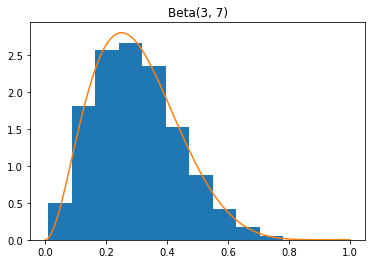

In [3]:
n = 10000

datos = beta(3, 7).rvs(size=n)
x_teorico = np.linspace(0, 1, 100)

plt.hist(datos, density=True)
plt.plot(x_teorico, beta.pdf(x_teorico, 3,7))
plt.title(f"Beta(3, 7)")
plt.show() 

#  Ejercicio 2

Repetir el ejercicio 1 para la distribución Gamma(4,2) y para la Normal(4,1).

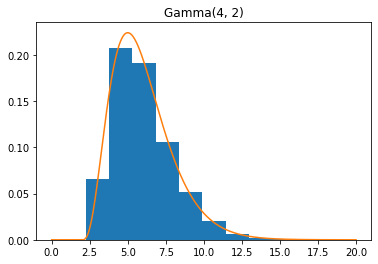

In [4]:
n = 10000
a, b =  4, 2
datos = gamma(a, b).rvs(size=n)
x_teorico = np.linspace(0, 20, 1000)

plt.hist(datos, density=True)
plt.plot(x_teorico, gamma.pdf(x_teorico, a, b))
plt.title(f"Gamma({a}, {b})")
plt.show() 

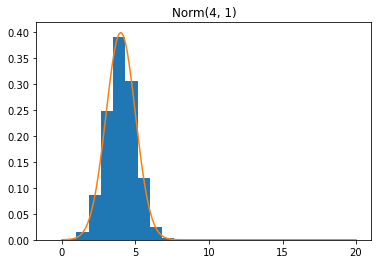

In [5]:
n = 10000
m, s =  4, 1
datos = norm(m, s).rvs(size=n)
x_teorico = np.linspace(0, 20, 1000)

plt.hist(datos, density=True)
plt.plot(x_teorico, norm.pdf(x_teorico, m, s))
plt.title(f"Norm({m}, {s})")
plt.show() 

# Ejercicio 3

Supongamos que tomaron datos $y$ y con un modelo bayesiano llegaron a que la distribución posterior para la probabilidad de que respondan un mail dentro de las 24 horas, $\theta$, es Beta(2,5). Les llega un nuevo mail. ¿Cuál es la probabilidad de que lo respondan en menos de 24 horas? Es decir, se pide $P()$, la posterior predictive. Resolverlo de dos formas:

1. Calculando analíticamente
1. Simulando datos. Para esto:
    1. Generar 10000 valores simulados del parámetro XXX usando la distribución posterior.
    1. Para cada valor del parámetro XXX , simular un XXX predicho.
    1. Resumir los valores de XXX correspondientes al valor XXX.

## Respuesta

Posterior: $P(\theta) = \theta^{a-1} \times (1-\theta)^{b-1}$

Con a=2, b=5

$P(\tilde{y}=1|y) = \int_0^1  P(\tilde{y}=1|\theta) \times P(\theta|y) d\theta$

$= \int_0^1  \theta \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1} (1-\theta)^{b-1} d\theta$

Como a = 2, y b = 5

$= \int_0^1  \frac{\Gamma(7)}{\Gamma(2)\Gamma(5)} \theta^{(2+1)-1} (1-\theta)^{5-1} d\theta$

$= \int_0^1  30\ \theta^{(2+1)-1} (1-\theta)^{5-1} d\theta$

Por lo que usamos una $Beta(3,5)$

In [6]:
a, b = 2, 5
cte = sc.gamma(a + b) / (sc.gamma(a)*sc.gamma(b))
res_beta = sc.beta(a+1, b)
print(f"Constante: {cte}")
print(f"Res beta: {res_beta}")
print(f"Resultado final: {cte * res_beta}")


Constante: 30.0
Res beta: 0.009523809523809525
Resultado final: 0.28571428571428575


In [7]:
# Parte 2

a, b = 2, 5

n = 10000
sim_betas = beta(a, b).rvs(size=n)

predichos = binom.rvs(1, sim_betas)
betas_que_si = sim_betas[predichos==1]

print(f"Nos quedamos con {len(betas_que_si)/len(predichos)*100:.3f}% de los casos")

Nos quedamos con 28.870% de los casos


# Ejercicio 4

Supongamos que quieren saber si los mails que reciben los lunes los responden más rápido que los que reciben los sábados. Con datos que recolectan de su propia experiencia llegan a que la distribución posterior para $\theta_L$ es $Beta(3,7)$ (correspondiente a mails que llegan los lunes) y $\theta_S$ es Beta(4,8) para los que llegan los sábados. Para responder la pregunta simulando, sigan estos pasos:

1. Simular 10000 valores de $\theta_L$ y $\theta_L$ .
1. Calcular, para cada par de valores $\theta_L(i)$ y $\theta_S(i)$, la diferencia
$\delta_i = \theta_L(i) - \theta_S(i)$.
1. Usar las muestras aleatorias $\delta_i$ para responder la pregunta. Por ejemplo, preguntarse por la probabilidad de que esa diferencia sea positiva.

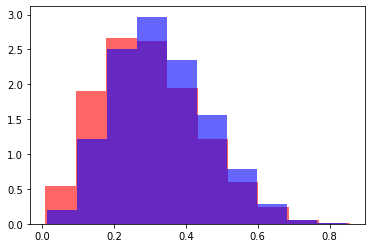

In [8]:
datos_l= beta(3, 7).rvs(size=n)
datos_s = beta(4, 8).rvs(size=n)

x_teorico = np.linspace(0, 1, 100)

plt.hist(datos_l, density=True, color="red", alpha=0.6)
plt.hist(datos_s, density=True, color="blue", alpha=0.6)
plt.show() 

In [9]:
lunes, sabados = (3,7), (4,8)

n = 10000
sim_betas_lunes = beta(*lunes).rvs(size=n)
sim_betas_sabados = beta(*sabados).rvs(size=n)

diffs = sim_betas_lunes - sim_betas_sabados
res = sum(diffs>0)/n

print(f"Es un {res*100:.3f}% más probable que respondan antes un lunes que un sábado")

Es un 42.000% más probable que respondan antes un lunes que un sábado


# Ejercicio 5

Un jardín botánico tiene tres especies de árboles, A, B y C. El 18% del total de los árboles está infectado con un plaga. Entre los infectados, 15% son A, 80% son B y 5% son C. Entre los no infectados 20% son A, 10% son B y 70% son C. Para monitorear el avance de la plaga, un empleado se acerca a un árbol cualquiera para examinarlo. Para resolver este ejercicio, simular datos de 10000 árboles.

1. ¿Cuál es la probabilidad de que el árbol esté infectado (prior)?
1. Si resulta que el árbol seleccionado es de la especie B. ¿Qué probabilidad tenía de haber seleccionado uno de esa especie?
1. Cuál es la probabilidad posterior de que el árbol seleccionado, de la especie B, esté infectado?
1. Comparar la probabilidad a priori de que el árbol esté infectado con la probabilidad posterior (luego de saber que el árbol seleccionado es de la especie B)?
1. Comparar los resultados de las simulaciones con el resultado exacto usando la regla de Bayes.

## Rta:

1. La probabilidad de que un árbol esté infectado es 0.18.
1. La probabilidad de que el árbol elegido sea B, es la probabilidad:

    $P(B|infectado) \times P(infectado) + P(B|sano) \times P(sano) = $

    $0.8 \times 0.18 + 0.10 \times 0.82 = 0.226$
1. Likelihood, punto anterior. 
  
  Prior: probabilidad de infectado

  $P(infectado|B) = P(B|infectado) \times P(infectado) / P(B)$

  $P(infectado|B) = (0.8 \times 0.18) \times 0.18 / .226 = 0.115$


# Ejercicio 6

Implementar el algoritmo de Metropolis-Hastings para conseguir muestras de una distribución $Normal(\mu=0.4, \sigma=0.6)$. Construir una función que tome como argumento el largo de la cadena (número de muestras), el valor inicial y algún parámetro necesario de la función de propuesta.

In [10]:
mu, sigma =  0.4, 0.6
dist = norm(mu, sigma) #.rvs(size=n)

# d.rvs(size=1) obtener muestras
# norm.pdf(0.01) La densidad
# norm.logpdf(0.01) La densidad

def metropolis_alg(data, distribucion, params_iniciales, pasos=100):
    d = distribucion(*params_iniciales)

    param_actual = params_iniciales[0]
    res = []
    res.append(param_actual)
    for i in range(pasos):
        param_candidato = d.rvs(size=1)


        hubo_diferencia = (log_likelihood(data, params=(param_candidato, 
                                                       params_iniciales[1])) 
                            + log_prior(param_candidato, distribucion, params_iniciales) 
                            - log_likelihood(data, params=params_iniciales) 
                            )

        if  log_unif() < hubo_diferencia:
            param_actual = param_candidato
        
        res.append(param_actual)

    return res

def log_unif(params=(0,1)):
    return loguniform(*params).rvs(1)[0]

def log_prior(param_proposal, distribucion=norm, params_iniciales=(0,1)):
    return distribucion.logpdf(param_proposal, *params_iniciales)


def log_likelihood(data, distribucion=norm, params=(0,1)):
    res = sum(distribucion.logpdf(data, *params))
    return res

c = metropolis_alg([], norm, (mu, sigma))

def generador_datos(cant_muestras, valor_inicial):
    pass


In [32]:
from scipy.stats import uniform

uniform(0,1).rvs(1)[0]

0.26698753090522986